In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv')
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [15]:
# Menangani data kosong 
n_cols = len(df['id'])
print(f'Jumlah entri : {n_cols}')
print('Kolom df dengan missing value lebih dari 35% jumlah data :')

for i, x in enumerate(df.columns):
    if df[x].count() < int(n_cols * (1-0.35)):
        print(f'{i+1}. {x}')


Jumlah entri : 7214
Kolom df dengan missing value lebih dari 35% jumlah data :
25. r_case_number
26. r_charge_degree
27. r_days_from_arrest
28. r_offense_date
29. r_charge_desc
30. r_jail_in
31. r_jail_out
32. violent_recid
34. vr_case_number
35. vr_charge_degree
36. vr_offense_date
37. vr_charge_desc


In [16]:
print('\nMenghapus kolom-kolom di atas....\n')
for i, x in enumerate(df.columns):
    if df[x].count() < int(n_cols * (1-0.35)):
        df.drop(x, axis=1, inplace=True)

# Menampilkan kolom-kolom yang tersisa
print(df.columns)


Menghapus kolom-kolom di atas....

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'is_violent_recid', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [19]:
df.drop(['id', 'name', 'first', 'last', 'age'], axis=1, inplace=True)

In [25]:
numeric = df.select_dtypes(include=[np.number]).columns.tolist()
categorical = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [26]:
# Imputasi dengan mode untuk kolom kategorikal dan numerikal
numeric_imputer = SimpleImputer(strategy='most_frequent')
df[numeric] = numeric_imputer.fit_transform(df[numeric])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical] = categorical_imputer.fit_transform(df[categorical])

In [29]:
# Encode variabel kategorikal
le = LabelEncoder()
for column in categorical:
    df[column] = le.fit_transform(df[column])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   compas_screening_date    7214 non-null   int32  
 1   sex                      7214 non-null   int32  
 2   dob                      7214 non-null   int32  
 3   age_cat                  7214 non-null   int32  
 4   race                     7214 non-null   int32  
 5   juv_fel_count            7214 non-null   float64
 6   decile_score             7214 non-null   float64
 7   juv_misd_count           7214 non-null   float64
 8   juv_other_count          7214 non-null   float64
 9   priors_count             7214 non-null   float64
 10  days_b_screening_arrest  7214 non-null   float64
 11  c_jail_in                7214 non-null   int32  
 12  c_jail_out               7214 non-null   int32  
 13  c_case_number            7214 non-null   int32  
 14  c_offense_date          

C:\Users\Chandra Aulia H\AppData\Local\Temp\ipykernel_24536\4011774756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


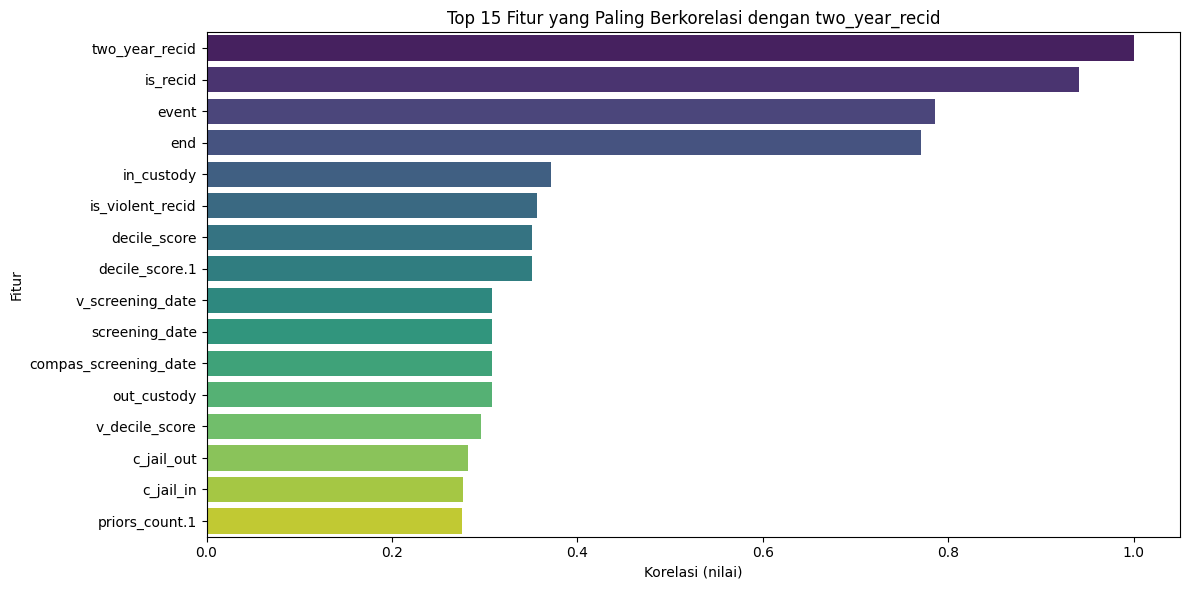

In [35]:
# Hitung korelasi antarfitur
correlation = df.corr()

# Ambil korelasi terhadap 'two_year_recid', urutkan dari yang paling besar (selain two_year_recid sendiri)
top_corr = correlation['two_year_recid'].abs().sort_values(ascending=False).head(16)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 15 Fitur yang Paling Berkorelasi dengan two_year_recid')
plt.xlabel('Korelasi (nilai)')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

In [38]:
top_features = top_corr.index.tolist()
df_top = df[top_features].copy()

X = df_top.drop('two_year_recid', axis=1)
y = df_top['two_year_recid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 5771
Jumlah data testing: 1443


In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [42]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9924

Classification Report:
              precision    recall  f1-score   support

       <=50K       1.00      0.99      0.99       823
        >50K       0.99      1.00      0.99       620

    accuracy                           0.99      1443
   macro avg       0.99      0.99      0.99      1443
weighted avg       0.99      0.99      0.99      1443


Confusion Matrix:
[[814   9]
 [  2 618]]


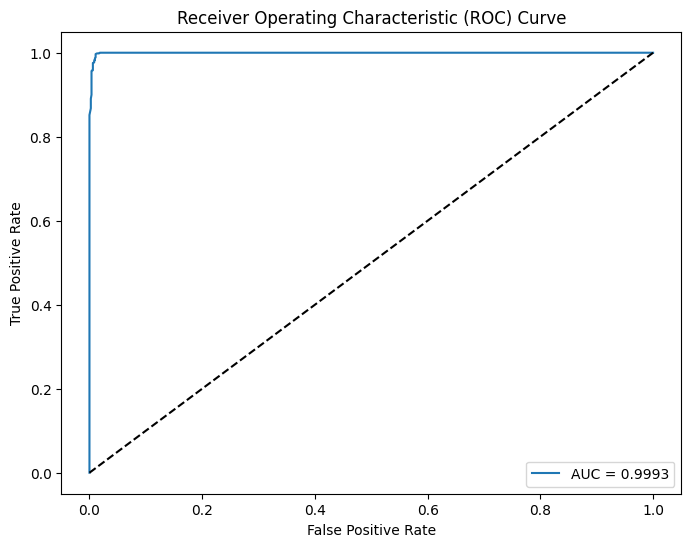

In [43]:
# Visualisasi ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()


# Penjelasan Metrik Evaluasi Model

1. **Akurasi (Accuracy)**
   - **Formula:**
   \[
   	ext{Accuracy} = 
rac{TP + TN}{TP + TN + FP + FN}
   \]
   Di mana:
     - \( TP \) = True Positives (Data yang diprediksi benar positif)
     - \( TN \) = True Negatives (Data yang diprediksi benar negatif)
     - \( FP \) = False Positives (Data yang diprediksi positif padahal negatif)
     - \( FN \) = False Negatives (Data yang diprediksi negatif padahal positif)
   
   - **Penjelasan:** Akurasi mengukur proporsi prediksi yang benar terhadap total data.

2. **Presisi (Precision)**
   - **Formula:**
   \[
   	ext{Precision} = 
rac{TP}{TP + FP}
   \]
   - **Penjelasan:** Precision mengukur seberapa tepat model dalam memprediksi kelas positif. Semakin tinggi presisi, semakin sedikit data yang salah dikategorikan sebagai positif.

3. **Recall (Sensitivitas)**
   - **Formula:**
   \[
   	ext{Recall} = 
rac{TP}{TP + FN}
   \]
   - **Penjelasan:** Recall mengukur seberapa baik model dalam menemukan seluruh data yang benar-benar positif. Recall tinggi menunjukkan bahwa model jarang melewatkan kelas positif.

4. **F1-Score**
   - **Formula:**
   \[
   F1 = 2 	imes 
rac{	ext{Precision} 	imes 	ext{Recall}}{	ext{Precision} + 	ext{Recall}}
   \]
   - **Penjelasan:** F1-Score adalah rata-rata harmonik antara Precision dan Recall. F1-Score berguna ketika ada ketidakseimbangan antara kelas positif dan negatif.

5. **ROC AUC (Area Under the Curve)**
   - **Penjelasan:** AUC mengukur area di bawah kurva ROC. Kurva ROC adalah plot yang menggambarkan trade-off antara True Positive Rate (Recall) dan False Positive Rate (FPR). AUC memberikan gambaran umum tentang seberapa baik model dalam membedakan antara kelas positif dan negatif.
